In [5]:
import sys
sys.path.append('/data/zhicai/code/da-fusion/')
from utils import parse_result
target_dir = '/data/zhicai/code/da-fusion/outputs/result/main_result_10shot'
# result = parse_result(target_dir, extra_column=['nepoch','use_mixup','use_cutmix'])
# dataset='flower'
# result[result['dataset']==dataset]

2023-11-26 15:05:02.336226: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [ ]:
target_dir = '/data/zhicai/code/da-fusion/outputs/result/main_ab_cutmix_mixup'
parse_result(target_dir, extra_column=['use_cutmix','use_mixup','mixup_probability'])

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# for dataset in ['aircraft']:
#     for shot in ['1shot','5shot','10shot', 'All']: 
def get_ds(dataset, shot):
    target_dir = f'/data/zhicai/code/da-fusion/outputs/result/main_result_{shot}'
    ds = parse_result(target_dir, extra_column=['syn_p'])
    ds=ds[ds['dataset']==dataset]
    # ds=ds[(ds['soft power']==0.5) | (ds['strategy'].isin(['realaug','aug']))]

    ds.columns = [''.join(col).strip() for col in ds.columns.values]
    ds_baseline = ds[ds['strategy']=='baseline']
    ds_realgen = ds[ds['strategy']=='realgen']
    ds_gen = ds[ds['strategy']=='gen']
    try:
        ds.drop(ds_baseline.index,inplace=True)
        ds.drop( ds_realgen.index,inplace=True)
        ds.drop(ds_gen.index,inplace=True)
    except KeyError:
        print('Removed') 
    print('dataset:', dataset, shot)
    print('baseline:\n', ds_baseline)
    print('real_gen:\n', ds_realgen)
    print('gen:\n', ds_gen)
    # print(ds.pivot(index=['strength','soft power','nepoch'], columns='strategy', values='accmean'))
    print('---'*10)
    return ds, ds_baseline, ds_realgen, ds_gen

In [6]:
dataset='pascal'
shot='pascal'
ds, ds_baseline, ds_realgen, ds_gen = get_ds(dataset,shot)


dataset: pascal pascal
baseline:
   dataset resolution    lr strength  strategy  soft power syn_p  accmean  \
0  pascal        224  0.05        0  baseline         0.5   0.1    85.37   

   accvar  
0  0.0637  
real_gen:
   dataset resolution    lr strength strategy  soft power syn_p    accmean  \
2  pascal        224  0.05           realgen         0.8   0.1  85.873333   

     accvar  
2  0.006533  
gen:
   dataset resolution    lr strength strategy  soft power syn_p    accmean  \
1  pascal        224  0.05               gen         0.8   0.1  85.483333   

     accvar  
1  0.120433  
------------------------------


In [7]:
# ds = ds[ds['soft power']==0.8]
ds


,dataset,resolution,lr,strength,strategy,soft power,syn_p,accmean,accvar
3,pascal,224,0.05,0.1,aug,0.8,0.1,85.323333,0.060433
7,pascal,224,0.05,0.3,aug,0.8,0.1,85.646667,0.075633
11,pascal,224,0.05,0.5,aug,0.8,0.1,85.253333,0.526033
15,pascal,224,0.05,0.7,aug,0.8,0.1,85.046667,0.029433
19,pascal,224,0.05,0.9,aug,0.8,0.1,85.600000,0.010300
23,pascal,224,0.05,1.0,aug,0.8,0.1,85.483333,0.067233
4,pascal,224,0.05,0.1,mixup,0.8,0.1,85.670000,0.125100
8,pascal,224,0.05,0.3,mixup,0.8,0.1,85.483333,0.038533
12,pascal,224,0.05,0.5,mixup,0.8,0.1,85.043333,0.001633
16,pascal,224,0.05,0.7,mixup,0.8,0.1,84.676667,0.099433


/tmp/ipykernel_318387/2149892721.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=x_values, y=y_values, label=label_name, marker=marker, ci=None)
/tmp/ipykernel_318387/2149892721.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=x_values, y=y_values, label=label_name, marker=marker, ci=None)
/tmp/ipykernel_318387/2149892721.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=x_values, y=y_values, label=label_name, marker=marker, ci=None)
/tmp/ipykernel_318387/2149892721.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=x_values, y=y_values, label=label_name, marker=marker, ci=None)


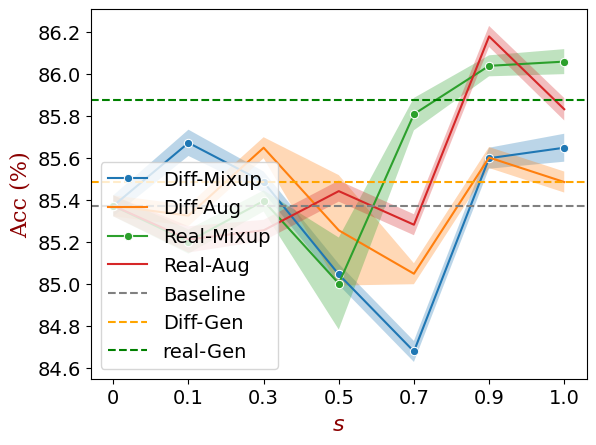

In [13]:
import numpy as np
font = {'family': 'serif',
    'color':  'darkred',
    'weight': 'normal',
    'size': 16,
    }
ds_mean = ds.pivot(index=['strength'], columns='strategy', values='accmean')
ds_var = ds.pivot(index=['strength'], columns='strategy', values='accvar')
for strategy,label_name,marker in zip(['mixup','aug','realmixup','realaug'],['Diff-Mixup','Diff-Aug','Real-Mixup','Real-Aug'],['o','','o','']):
    mean_values = ds_mean[strategy]
    var_values = ds_var[strategy]
    baseline_value = ds_baseline['accmean'].mean()
    x_values = ['0'] +  mean_values.index.tolist()
    y_values = np.array([baseline_value] + mean_values.values.tolist())
    var_values =np.clip(np.array( [0] + var_values.values.tolist()),0.1,0.7)
    sns.lineplot(x=x_values, y=y_values, label=label_name, marker=marker, ci=None)
    # ax.fill_between(mean_values.index, mean_values - 1 * var_values, mean_values + 1 * var_values, alpha=0.3)
    plt.fill_between(x_values, y_values - 0.5*var_values, y_values + 0.5*var_values, alpha=0.3)
plt.axhline(y=ds_baseline['accmean'].mean(), color='gray', linestyle='--', label='Baseline')
plt.axhline(y=ds_gen['accmean'].mean(), color='orange', linestyle='--', label='Diff-Gen')
plt.axhline(y=ds_realgen['accmean'].mean(), color='green', linestyle='--', label='real-Gen')
plt.xlabel('$s$',fontdict=font)
plt.ylabel(ylabel='Acc (%)',fontdict=font)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='lower left')
# plt.ylim(64,72)
plt.savefig(f'../figures/results_{dataset}_{shot}.pdf',bbox_inches='tight')
# plt.savefig('../figures/results_cub_5shot.pdf',bbox_inches='tight')
# sns.lineplot(x='strength', y='accmean', hue='strategy', data=ds_pivot, ci=None)
# ds = ds.pivot(index=['strength'], columns='strategy', values='accmean',)

In [ ]:
ds_var[strategy]

In [ ]:
mean_values.index

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have ds_mean1, ds_mean2, ds_mean3, and ds_mean4

font = {'family': 'serif',
        'color': 'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharex=True, sharey=True)
ds_list=[[ds_mean,ds_var,ds_baseline,ds_gen]]
for ax, ds in zip(axes.flatten(), ds_list):
        for strategy, label_name, marker in zip(        ['mixup', 'aug', 'realmixup', 'realaug'],
                                                        ['Diff-Mixup', 'Diff-Aug', 'Real-Mixup', 'Real-Aug'],
                                                        ['o', '', 'o', '']):
                ds_mean=ds[0]
                ds_var=ds[1]
                ds_baseline=ds[2]
                ds_gen=ds[3]
                mean_values = ds_mean[strategy]
                var_values = ds_var[strategy]
                baseline_value = ds_baseline['accmean'].mean()
                x_values = ['0'] +  mean_values.index.tolist()
                y_values = [baseline_value] + mean_values.values.tolist()
                sns.lineplot(x=x_values, y=y_values, label=label_name, marker=marker, ci=None, ax=ax)
                ax.fill_between(mean_values.index, mean_values - 1 * var_values, mean_values + 1 * var_values, alpha=0.3)
                ax.axhline(y=ds_baseline['accmean'].mean(), color='gray', linestyle='--', label='Baseline')
                ax.axhline(y=ds_gen['accmean'].mean(), color='red', linestyle='--', label='Diff-Gen')

plt.xlabel('$s$', fontdict=font)
plt.ylabel(ylabel='Acc (%)', fontdict=font)
axes.flatten()[-1].legend()  # Display a single legend
plt.show()
# plt.savefig('../figures/results_cub_5shot.pdf', bbox_inches='tight')


In [ ]:
x_values